# Homework 1 Forest Wolf

### Import Text Adventures

In [1]:
from text_adventure_games import (
    games, parsing, actions, things, blocks, viz
)
import text_adventure_games.actions.fish

## Locations

In [2]:

forest = things.Location(
    "Forest",
    "You are in a dense forest."
)

river = things.Location(
    "River",
    "You are standing by a flowing river. You can see fish swimming."
)

cave = things.Location(
    "Cave",
    "A dark cave lies ahead, but a hungry wolf blocks your way."
)
#loss state
cliff = things.Location(
    "Cliff",
    "There is a steep cliff here. You fall off the cliff and lose the game. THE END",
)
cliff.set_property("game_over", True)

# Map of Locations
forest.add_connection("north", river)
# river.add_connection("south", forest)
forest.add_connection("east", cave)
forest.add_connection("south", cliff)

## Items

### Gettable Items

In [3]:
#tool so player can catch the fish
fishing_pole = things.Item(
    "pole",
    "a fishing pole",
    "A SIMPLE FISHING POLE.",
)
forest.add_item(fishing_pole)

# Fish
fish = things.Item(
    "fish",
    "a fish",
    "A freshly caught fish for feeding a hungry wolf."
)
fish.set_property("gettable", True)


### Scenery Items

_We called these "non-gettable"_

In [4]:
river = things.Location(
    "River",
    "You are standing by a flowing river. You can see fish swimming in the water."
)
river.set_property("has_fish", True)
river.add_command_hint("catch fish with fishing pole")

# Add river as a location that the player can travel to
forest.add_connection("north", river)

# Wolf
wolf = things.Item(
    "wolf",
    "a hungry wolf",
    "The wolf is blocking the cave."
)
wolf.set_property("feedable", True)
wolf.add_command_hint("give fish to wolf")
cave.add_item(wolf)


## Characters

### Player

In [5]:
# Player
player = things.Character(
    name="The Player",
    description="A brave adventurer seeking treasure.",
    persona="I am on an adventure.",
)


## Actions

In [7]:
class GiveFish(actions.Action):
    ACTION_NAME = 'give fish'
    ACTION_DESCRIPTION = 'Give a fish to the wolf'

    def __init__(self, game, command):
        super().__init__(game)
        self.command = command
        # check if  wolf in the current location
        self.wolf = self.parser.match_item(command, self.game.player.location.items.values())
        # get the fish from the player's inventory
        self.fish = self.parser.match_item(command, self.game.player.get_inventory())

    def check_preconditions(self) -> bool:
        # check if b the wolf is present in the location
        if not self.wolf or self.wolf.name != "wolf":
            self.parser.fail("There is no wolf here to give the fish to.")
            return False
        # does player has the fish
        if not self.fish or self.fish.name != "fish":
            self.parser.fail("You don't have a fish to give.")
            return False
        return True

    def apply_effects(self):
        #  feed the wolf
        self.game.player.remove_item(self.fish.name)
        self.wolf.set_property("feedable", False)
        self.parser.ok("You fed the wolf. It moves away, allowing you to enter the cave.")
        
        # The End!!!
        self.game.set_game_over(True)
        self.parser.ok("Congratulations! You have successfully completed the game!")


## Game


In [8]:
class WolfCaveGame(games.Game):
    def __init__(self, start_at: things.Location, player: things.Character, wolf: things.Item):
        super().__init__(start_at, player)
        self.player.set_property("is_hungry", True)
        self.wolf = wolf

    def is_won(self) -> bool:
        if not self.wolf.get_property("feedable"):
            self.parser.ok("The wolf has been fed, and you can now enter the cave. You win!")
            return True
        return False

    def is_game_over(self) -> bool:
        if super().is_game_over():
            return True
        if self.is_won():
            return True
        return False

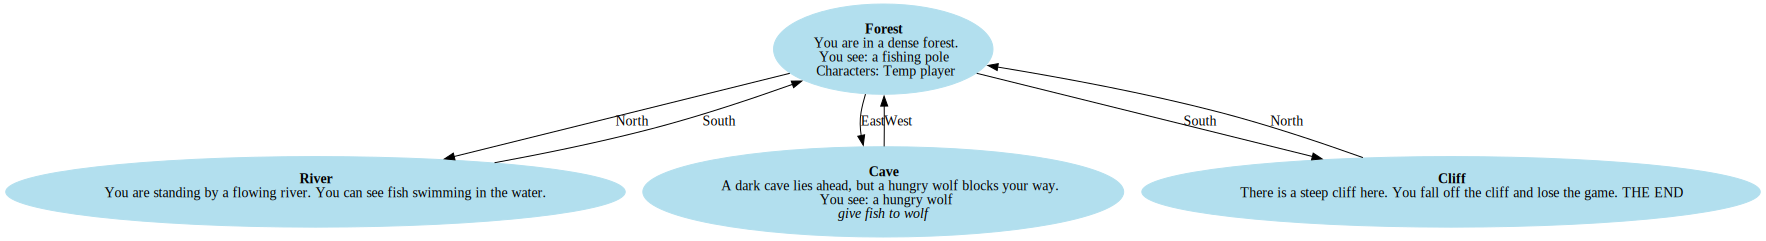

In [9]:
tempgame = games.Game(forest, things.Character(name="Temp Player", description="", persona=""))

from text_adventure_games.viz import Visualizer
viz = Visualizer(tempgame)
graph = viz.visualize()
graph

In [10]:
from text_adventure_games.actions.fish import Catch_Fish

game = WolfCaveGame(forest, player, wolf)
game.custom_actions = [GiveFish]
game.parser.add_action(Catch_Fish)
game.game_loop()

You are in a dense forest.
Exits:
North to River
East to Cave
South to Cliff

You see:
 * a fishing pole
Characters:
 *

The Player got the pole.
You are standing by a flowing river. You can see fish swimming in the water.
Exits:
South to Forest




The Player dips their hook into the pond and catches a fish
You are in a dense forest.
Exits:
North to River
East to Cave
South to Cliff


Characters:
 *

A dark cave lies ahead, but a hungry wolf blocks your way.
Exits:
West to Forest

You see:
 * a hungry wolf
        give fish to wolf


The player gave the fish to The player
The player eats the fish. It tastes disgusting! It's raw! And definitely not
sashimi-grade!
I don't see it.
I don't see it.
I'm not sure what you want to do.
I'm not sure what you want to do.
I'm not sure what you want to do.
I'm not sure what you want to do.
I'm not sure what you want to do.


In [ ]:
from text_adventure_games.viz import Visualizer

viz = Visualizer(game)
graph = viz.visualize()

graph